In [461]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import statistics
from math import pow
import numpy as np

Baca File

In [462]:
data = pd.read_csv('influencers.csv')

Fungsi Keanggotaan

In [463]:
batasFollower = [[0, 0, 6500, 10000],[6500, 10000, 26500, 30000],[26500, 30000, 66500, 70000], [66500, 70000, 100000, 100000]]
batasEngagement = [[0, 0, 1.8, 2.5],[1.8, 2.5, 4.8, 5.5],[4.8, 5.5, 10, 10]]
batasMamdani = [[0, 0, 25, 30],[25, 30, 55, 60],[55, 60, 100, 100]]
sifat1 = ["berusaha", "standar", "lumayan", "selebgram"]
sifat2 = ["rendah", "sedang", "tinggi"]
sifat3 = ["nano", "mikro", "medium"]

In [464]:
def nilaiNaik(x,a,b):
    return (x-a)/(b-a)

def nilaiTurun(x,c,d):
    return (-1*(x-d))/(d-c)

def Trapesium(x, batas, sifat):
    nilai = []
    for i in range (len(batas)):
        if ( (batas[i][0] == batas[i][1] and x <= batas[i][2]) or (batas[i][2] == batas[i][3] and x >= batas[i][1]) or (x>= batas[i][1] and x <= batas[i][2])) :
            nilai.append([1, sifat[i]])
        elif (x > batas[i][0] and x < batas[i][1]):
            nilai.append([ nilaiNaik(x,batas[i][0],batas[i][1]), sifat[i] ])
        elif (x > batas[i][2] and x < batas[i][3]):
            nilai.append([ nilaiTurun(x,batas[i][2],batas[i][3]), sifat[i] ])
        elif ( x<= batas[i][0] or x>= batas[i][1]):
            nilai.append([0, sifat[i]])
    return nilai

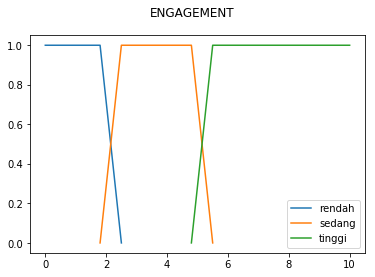

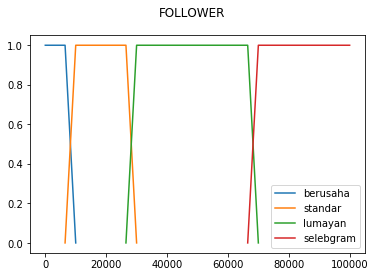

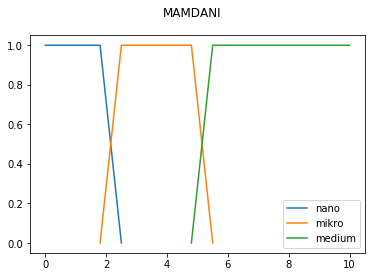

In [465]:
markFollower = [[0, 0, 6500, 10000],[6500, 10000, 26500, 30000],[26500, 30000, 66500, 70000], [66500, 70000, 100000, 100000]]
markEngagement = [[0, 0, 1.8, 2.5],[1.8, 2.5, 4.8, 5.5],[4.8, 5.5, 10, 10]]
markMamdani = [[0, 0, 25, 30],[25, 30, 55, 60],[55, 60, 100, 100]]

plt.plot(markEngagement[0], [1, 1, 1, 0], label="rendah")
plt.plot(markEngagement[1], [0, 1, 1, 0], label="sedang")
plt.plot(markEngagement[2], [0, 1, 1, 1], label="tinggi")
plt.suptitle("ENGAGEMENT")
plt.legend()
plt.show()

plt.plot(markFollower[0], [1, 1, 1, 0], label="berusaha")
plt.plot(markFollower[1], [0, 1, 1, 0], label="standar")
plt.plot(markFollower[2], [0, 1, 1, 0], label="lumayan")
plt.plot(markFollower[3], [0, 1, 1, 1], label="selebgram")
plt.suptitle("FOLLOWER")
plt.legend()
plt.show()

plt.plot(markEngagement[0], [1, 1, 1, 0], label="nano")
plt.plot(markEngagement[1], [0, 1, 1, 0], label="mikro")
plt.plot(markEngagement[2], [0, 1, 1, 1], label="medium")
plt.suptitle("MAMDANI")
plt.legend()
plt.show()


Inference

In [466]:
def inference(a,b):
    if (a == "selebgram" and b == "tinggi"):
        return "medium"
    elif (a == "selebgram" and b == "sedang"):
        return "medium"
    elif (a == "selebgram" and b == "rendah"):
        return "mikro"
    elif (a == "lumayan" and b == "tinggi"):
        return "medium"
    elif (a == "lumayan" and b == "sedang"):
        return "mikro"
    elif (a == "lumayan" and b == "rendah"):
        return "nano"
    elif (a == "standar" and b == "tinggi"):
        return "mikro"
    elif (a == "standar" and b == "sedang"):
        return "nano"
    elif (a == "standar" and b == "rendah"):
        return "nano"
    elif (a == "berusaha" and b == "tinggi"):
        return "mikro"
    elif (a == "berusaha" and b == "sedang"):
        return "nano"
    elif (a == "berusaha" and b == "rendah"):
        return "nano"

def LebihKecil(a,b):
    if (a < b):
        return a
    else:
        return b
    
def HasilInference(fuzzy1, fuzzy2):
    hasil = []
    for i in range (len(fuzzy1)):
        for j in range (len(fuzzy2)):
            hasil.append([ inference(fuzzy1[i][1], fuzzy2[j][1]), LebihKecil(fuzzy1[i][0], fuzzy2[j][0]) ])
    return hasil
            
def HAInference(data):
    medium = []
    nano = []
    mikro = []
    result = []
    for i in range (len(data)):
        if (data[i][0] == 'medium'):
            medium.append(data[i][1])
        elif (data[i][0] == "mikro"):
            mikro.append(data[i][1])
        elif (data[i][0] == "nano"):
            nano.append(data[i][1])
    result.append(["nano", max(nano)])
    result.append(["mikro", max(mikro)])
    result.append(["medium", max(medium)])
    return result

Defuzzification

In [467]:
def Xnaik(a, b, n):
    return ((n*(b-a))+a)

def Xturun(c, d,n):
    return (((n*(d-c))/-1)+d)

def DTrapesium(x, batas, potong):
    tampungan = []
    for i in range (len(batas)):
        if (potong[i][1] != 0):
            if (batas[i][0] != batas[i][1]):
                temp = Xnaik(batas[i][0],batas[i][1],potong[i][1])
                batas[i][1] = temp
            if (batas[i][2] != batas[i][3]):
                temp = Xturun(batas[i][2],batas[i][3],potong[i][1])
                batas[i][2] = temp
    
    for i in range (len(batas)):
        if (potong[i][1] != 0):
            if (x > batas[i][0] and x < batas[i][1]):
                tampungan.append([ nilaiNaik(x,batas[i][0],batas[i][1])])
            elif (x > batas[i][2] and x < batas[i][3]):
                tampungan.append([ nilaiTurun(x,batas[i][2],batas[i][3]) ])
            elif ( (batas[i][0] == batas[i][1] and x <= batas[i][2]) or (batas[i][2] == batas[i][3] and x >= batas[i][1]) or (x>= batas[i][1] and x <= batas[i][2])) :
                tampungan.append([potong[i][1]])
            elif ( x<= batas[i][0] or x>= batas[i][1]):
                tampungan.append([0])
        else:
            tampungan.append([0])
    return tampungan

In [468]:
def MamdaniStyle(potong,batasMamdani):
    z = np.arange(5,100,10)
    hasil = []
    zkali = []
    for i in range (len(z)):
        hasil.append(max(DTrapesium(z[i],batasMamdani, potong))[0])
    for i in range (len(z)):
        zkali.append(z[i]*hasil[i])
    return sum(zkali)/sum(hasil)

Main Program

In [469]:
selected = []
m = []
inidong = []
for i in range (len(data)):
    fo=Trapesium(data["followerCount"][i], batasFollower, sifat1)
    eg= Trapesium(data["engagementRate"][i], batasEngagement, sifat2)
    hi= HasilInference(fo, eg)
    ha=HAInference(hi)
    m.append(MamdaniStyle(ha,batasMamdani))
a = np.argsort(m)[::-1]

print("Influencers yang Terpilih")
for i in range (20):
    inidong.append(data["id"][a[i]])
    print("ID : ",data["id"][a[i]]," Follower : ",data["followerCount"][a[i]],"Engagement Rate : ",data["engagementRate"][a[i]])

Influencers yang Terpilih
ID :  75  Follower :  94551 Engagement Rate :  3.0
ID :  59  Follower :  58987 Engagement Rate :  6.7
ID :  2  Follower :  38237 Engagement Rate :  5.8
ID :  11  Follower :  95117 Engagement Rate :  6.6
ID :  13  Follower :  90773 Engagement Rate :  6.7
ID :  25  Follower :  77585 Engagement Rate :  2.7
ID :  41  Follower :  81909 Engagement Rate :  3.6
ID :  60  Follower :  58403 Engagement Rate :  5.2
ID :  19  Follower :  55217 Engagement Rate :  4.9
ID :  74  Follower :  22394 Engagement Rate :  6.3
ID :  72  Follower :  61456 Engagement Rate :  4.6
ID :  67  Follower :  31642 Engagement Rate :  3.4
ID :  61  Follower :  53701 Engagement Rate :  4.5
ID :  100  Follower :  15788 Engagement Rate :  6.8
ID :  76  Follower :  39175 Engagement Rate :  3.3
ID :  93  Follower :  27657 Engagement Rate :  5.5
ID :  39  Follower :  9890 Engagement Rate :  9.4
ID :  53  Follower :  56257 Engagement Rate :  3.2
ID :  48  Follower :  19925 Engagement Rate :  6.5
ID :  

Cek Akurasi

In [470]:
kalikan = []
jawaban = []
for i in range (len(data)):
    kalikan.append(data["followerCount"][i]*data["engagementRate"][i])
ik = np.argsort(kalikan)[::-1]
for i in range (20):
    jawaban.append(data["id"][ik[i]])

def hitungAkurasi(jawab,hasilfuzzy):
    akurasi = 0
    for i in range (len(hasilfuzzy)):
        for j in range (len(jawab)):
            if (jawab[j]==[hasilfuzzy[i]]):
                akurasi +=1
    return (akurasi/len(jawab))


In [471]:
hitungAkurasi(inidong,jawaban)

1.0

Output to CSV

In [472]:
df = pd.DataFrame(jawaban) 

df.to_csv('chosen.csv', index=False, header=None)